In [1]:
import os
import shutil
import numpy as np
import reorder_data

In [2]:
# initial dataset, needed to change structure

sourcedir = "data/fruit for yolo/test/test"
imagesdir = "dataset/images/test"
labelsdir = "dataset/labels/test"

def move_initial_dataset(): 
    for element in os.listdir(sourcedir):
        # print(element, element[-3]); exit()
        if element[-3:] == "txt":
            shutil.move(f"{sourcedir}/{element}", f"{labelsdir}/{element}")
        elif element[-3:] == "jpg":
            shutil.move(f"{sourcedir}/{element}", f"{imagesdir}/{element}")

In [3]:
# rest of the datasets, already structured, need to be merged

relevant_datasets = {
    # 5 classes, so many pictures for not much actually
    "food-detection-5": ['apple', 'banana', 'cabbage', 'capsicum', 'tomato'],
    # 94 classes
    "Food-Item-Detection-1": ['Apple', 'Banana', 'Beans', 'Capsicum', 'Carrot', 'Cucumber', 'Curli-Flower', 'Orange', 'Tomato', 'Tomatos', 'apple', 'asparagus', 'avocado', 'banana', 'beef', 'bell_pepper', 'bento', 'blueberries', 'bottle', 'bread', 'broccoli', 'butter', 'can', 'carrot', 'cauliflower', 'cheese', 'chicken', 'chicken_breast', 'chocolate', 'coffee', 'corn', 'cucumber', 'egg', 'eggs', 'energy_drink', 'fish', 'flour', 'garlic', 'goat_cheese', 'grapes', 'grated_cheese', 'green_beans', 'ground_beef', 'guacamole', 'ham', 'heavy_cream', 'humus', 'juice', 'ketchup', 'kothmari', 'leek', 'lemon', 'lettuce', 'lime', 'mango', 'marmelade', 'mayonaise', 'milk', 'mushrooms', 'mustard', 'nuts', 'onion', 'orange', 'pak_choi', 'parsley', 'peach', 'pear', 'pineapple', 'plasticsaveholder', 'pot', 'potato', 'potatoes', 'pudding', 'red_cabbage', 'red_grapes', 'rice_ball', 'salad', 'sandwich', 'sausage', 'shrimp', 'smoothie', 'spinach', 'spring_onion', 'strawberries', 'sugar', 'sweet_potato', 'tea_a', 'tea_i', 'tomato', 'tomato_sauce', 'tortillas', 'turkey', 'watermelon', 'yogurt'],
    # 138 classes
    "Grocery1-1": ['-', 'Apple', 'Artichoke', 'Asparagus', 'Avocado', 'Banana', 'Beans', 'Beetroot', 'Blackberries', 'Blueberries', 'Book', 'Broccoli', 'Brussel Sprouts', 'Butter', 'Cabbage', 'Cantaloupe', 'Carrots', 'Cauliflower', 'Cerealbox', 'Cheese', 'Clementine', 'Coffee', 'Corn', 'Cucumber', 'Detergent', 'Drinks', 'Egg', 'Eggplant', 'Eggs', 'Fish', 'Galia', 'Grapes', 'Honeydew', 'Juice', 'Lemon', 'Lettuce', 'Meat', 'Milk', 'Mushroom', 'Mushrooms', 'Nectarine', 'Onion', 'Orange', 'Oranges', 'Peas', 'Pineapple', 'Plum', 'Pomegranate', 'Potato', 'Raspberries', 'Salad', 'Sauce', 'Shallot', 'Spinach', 'Squash', 'Strawberries', 'Strawberry', 'Sweetcorn', 'Tofu', 'Tomato', 'Tomatoes', 'Watermelon', 'Yogurt', 'Zucchini', 'apple', 'apples', 'asparagus', 'aubergine', 'bacon', 'banana', 'bananas', 'bazlama', 'beef', 'blueberries', 'bread', 'broccoli', 'butter', 'carrot', 'carrots', 'cheese', 'chicken', 'chicken_breast', 'chocolate', 'chocolate chips', 'corn', 'courgettes', 'cream', 'cream cheese', 'dates', 'eggs', 'flour', 'ginger', 'goat_cheese', 'green beans', 'green bell pepper', 'green chilies', 'green_beans', 'ground_beef', 'ham', 'heavy_cream', 'juice', 'lemon', 'lemons', 'lettuce', 'lime', 'mango', 'meat', 'milk', 'mineral water', 'mushroom', 'mushrooms', 'olive', 'olives', 'onion', 'orange', 'parsley', 'peach', 'peppers', 'potato', 'potatoes', 'red bell pepper', 'red grapes', 'red onion', 'salami', 'sauce', 'sausage', 'shrimp', 'spinach', 'spring onion', 'strawberries', 'strawberry', 'sugar', 'sweet_potato', 'tomato', 'tomato paste', 'tomatoes', 'yellow bell pepper', 'yoghurt'],
    # 16 classes
    "Pathpal-Grocery-Detector-3-2": ['Apple', 'Banana', 'Book', 'Carrots', 'Cerealbox', 'Detergent', 'Drinks', 'Egg', 'Lemon', 'Meat', 'Milk', 'Orange', 'Strawberries', 'Tomato', 'Watermelon', 'bread'],
    # 10 classes
    "Pathpal-Grocery-Detector-3-10": ['Apple', 'Banana', 'Book', 'Carrots', 'Detergent', 'Drinks', 'Lemon', 'Meat', 'Milk', 'Orange'],
    # 14 classes (initial one)
    "initial-fruit-vegetables": ['banana_wb', 'banana', 'blackberry', 'raspberry', 'lemon_wb', 'lemon', 'grapes_wb', 'grapes', 'tomato_wb', 'tomato', 'apple_wb', 'apple', 'chilli_wb', 'chilli'] # i removed the wobs
}

def get_classes(lists: list[str]) -> list[str]:
    result = []
    for lst in lists:
        for word in lst:
            word = word.capitalize()
            if word not in result:
                result.append(word)
    return result

tot_classes = get_classes(relevant_datasets.values())
print(tot_classes)
print(len(tot_classes))
# ['Apple', 'Banana', 'Cabbage', 'Capsicum', 'Tomato', 'Beans', 'Carrot', 'Cucumber', 'Curli-flower', 'Orange', 'Tomatos', 'Asparagus', 'Avocado', 'Beef',
# 'Bell_pepper', 'Bento', 'Blueberries', 'Bottle', 'Bread', 'Broccoli', 'Butter', 'Can', 'Cauliflower', 'Cheese', 'Chicken', 'Chicken_breast', 'Chocolate',
# 'Coffee', 'Corn', 'Egg', 'Eggs', 'Energy_drink', 'Fish', 'Flour', 'Garlic', 'Goat_cheese', 'Grapes', 'Grated_cheese', 'Green_beans', 'Ground_beef', 'Guacamole',
# 'Ham', 'Heavy_cream', 'Humus', 'Juice', 'Ketchup', 'Kothmari', 'Leek', 'Lemon', 'Lettuce', 'Lime', 'Mango', 'Marmelade', 'Mayonaise', 'Milk', 'Mushrooms',
# 'Mustard', 'Nuts', 'Onion', 'Pak_choi', 'Parsley', 'Peach', 'Pear', 'Pineapple', 'Plasticsaveholder', 'Pot', 'Potato', 'Potatoes', 'Pudding', 'Red_cabbage',
# 'Red_grapes', 'Rice_ball', 'Salad', 'Sandwich', 'Sausage', 'Shrimp', 'Smoothie', 'Spinach', 'Spring_onion', 'Strawberries', 'Sugar', 'Sweet_potato', 'Tea_a',
# 'Tea_i', 'Tomato_sauce', 'Tortillas', 'Turkey', 'Watermelon', 'Yogurt', '-', 'Artichoke', 'Beetroot', 'Blackberries', 'Book', 'Brussel sprouts', 'Cantaloupe',
# 'Carrots', 'Cerealbox', 'Clementine', 'Detergent', 'Drinks', 'Eggplant', 'Galia', 'Honeydew', 'Meat', 'Mushroom', 'Nectarine', 'Oranges', 'Peas', 'Plum',
# 'Pomegranate', 'Raspberries', 'Sauce', 'Shallot', 'Squash', 'Strawberry', 'Sweetcorn', 'Tofu', 'Tomatoes', 'Zucchini', 'Apples', 'Aubergine', 'Bacon', 'Bananas',
# 'Bazlama', 'Chocolate chips', 'Courgettes', 'Cream', 'Cream cheese', 'Dates', 'Ginger', 'Green beans', 'Green bell pepper', 'Green chilies', 'Lemons', 'Mineral water',
# 'Olive', 'Olives', 'Peppers', 'Red bell pepper', 'Red grapes', 'Red onion', 'Salami', 'Spring onion', 'Tomato paste', 'Yellow bell pepper', 'Yoghurt', 'Banana_wb', 'Blackberry',
# 'Raspberry', 'Lemon_wb', 'Grapes_wb', 'Tomato_wb', 'Apple_wb', 'Chilli_wb', 'Chilli']


['Apple', 'Banana', 'Cabbage', 'Capsicum', 'Tomato', 'Beans', 'Carrot', 'Cucumber', 'Curli-flower', 'Orange', 'Tomatos', 'Asparagus', 'Avocado', 'Beef', 'Bell_pepper', 'Bento', 'Blueberries', 'Bottle', 'Bread', 'Broccoli', 'Butter', 'Can', 'Cauliflower', 'Cheese', 'Chicken', 'Chicken_breast', 'Chocolate', 'Coffee', 'Corn', 'Egg', 'Eggs', 'Energy_drink', 'Fish', 'Flour', 'Garlic', 'Goat_cheese', 'Grapes', 'Grated_cheese', 'Green_beans', 'Ground_beef', 'Guacamole', 'Ham', 'Heavy_cream', 'Humus', 'Juice', 'Ketchup', 'Kothmari', 'Leek', 'Lemon', 'Lettuce', 'Lime', 'Mango', 'Marmelade', 'Mayonaise', 'Milk', 'Mushrooms', 'Mustard', 'Nuts', 'Onion', 'Pak_choi', 'Parsley', 'Peach', 'Pear', 'Pineapple', 'Plasticsaveholder', 'Pot', 'Potato', 'Potatoes', 'Pudding', 'Red_cabbage', 'Red_grapes', 'Rice_ball', 'Salad', 'Sandwich', 'Sausage', 'Shrimp', 'Smoothie', 'Spinach', 'Spring_onion', 'Strawberries', 'Sugar', 'Sweet_potato', 'Tea_a', 'Tea_i', 'Tomato_sauce', 'Tortillas', 'Turkey', 'Watermelon', 

In [ ]:
# add tot_classes to data.yaml
yaml = open("merged_dataset/data.yaml", "a", encoding="utf8")
# print(tot_classes, file = yaml)
yaml.close()

In [ ]:
# operations on the dataset: class balancing, decluttering
with open("labels_balancing.txt", "r", encoding="utf8") as labelsinfo:
    labelsinfo = labelsinfo.readlines()
for index, line in enumerate(labelsinfo):
    labelsinfo[index] = line.strip().split()[:3]

frequencies = {label:[n_images, tot_freq] for label, n_images, tot_freq in labelsinfo[1:]}


In [27]:
# useful functions
len(set(tot_classes)) - len(frequencies.keys())
missing = set(tot_classes) - frequencies.keys()

def in_which_dataset(label: str):
    result = list()
    for dataset in relevant_datasets.keys():
        if label.casefold() in [word.casefold() for word in relevant_datasets[dataset]]:
            result.append(dataset)
    return result

def get_correspective_path(filepath: str) -> str:
    "get labels path from image path and viceversa"
    folder, extension = "images", "jpg"
    if filepath[-3:] == "jpg":
        folder, extension = "labels", "txt"
    temp_path = filepath.split("/")
    temp_path[-2] = folder
    temp_path[-1] = temp_path[-1][:-3] + extension
    return "/".join(temp_path)

{label : in_which_dataset(label) for label in missing}
in_which_dataset("book")

['Grocery1-1', 'Pathpal-Grocery-Detector-3-2', 'Pathpal-Grocery-Detector-3-10']

In [ ]:
# get images that contain a label
label = "bento"

def contain(label: str) -> list[str]:
    folder = "merged_dataset"
    l_index = str(tot_classes.index(label.capitalize()))
    result = []
    for path in {f"{folder}/train/labels", f"{folder}/valid/labels"}:
        for filename in os.listdir(path):
            filepath = f"{path}/{filename}"
            with open(filepath, "r", encoding="utf8") as labelfile:
                lines = labelfile.readlines()
            for line in lines:
                if line.startswith(l_index):
                    result.append(filepath)
    return result

images = []
for labelfilepath in contain(label):
    imagepath = get_correspective_path(labelfilepath)
    reorder_data.visualize_bboxes(imagepath)
    images.append(imagepath)

with open("bentofiles.txt", "w", encoding="utf8") as bookfile:
    for image in images:
        print(image, file=bookfile)
print(len(images))

# results:
# "-" seems to indicate 8 images of limes
# for some reason there are many images containing "book", printed in booksfile.txt

In [1]:
# work on classes, making a bigger dataset
from collections import defaultdict

merged_dataset_classes = ['Apple', 'Banana', 'Cabbage', 'Capsicum', 'Tomato', 'Beans', 'Carrot', 'Cucumber', 'Curli-flower', 'Orange', 'Tomatos -> Tomato', 'Asparagus', 'Avocado', 'Beef',
'Bell_pepper', 'Bento', 'Blueberries', 'Bottle', 'Bread', 'Broccoli', 'Butter', 'Can', 'Cauliflower', 'Cheese', 'Chicken', 'Chicken_breast', 'Chocolate',
'Coffee', 'Corn', 'Egg', 'Eggs -> Egg', 'Energy_drink', 'Fish', 'Flour', 'Garlic', 'Goat_cheese -> Cheese', 'Grapes', 'Grated_cheese -> Cheese', 'Green_beans -> Green beans', 'Ground_beef',
'Guacamole', 'Ham', 'Heavy_cream', 'Humus', 'Juice', 'Ketchup', 'Kothmari', 'Leek', 'Lemon', 'Lettuce', 'Lime', 'Mango', 'Marmelade', 'Mayonaise', 'Milk', 'Mushrooms',
'Mustard', 'Nuts', 'Onion', 'Pak_choi', 'Parsley', 'Peach', 'Pear', 'Pineapple', 'Plasticsaveholder', 'Pot', 'Potato', 'Potatoes -> Potato', 'Pudding', 'Red_cabbage',
'Red_grapes -> Grapes', 'Rice_ball', 'Salad', 'Sandwich', 'Sausage', 'Shrimp', 'Smoothie', 'Spinach', 'Spring_onion', 'Strawberries', 'Sugar', 'Sweet_potato', 'Tea_a',
'Tea_i', 'Tomato_sauce', 'Tortillas', 'Turkey', 'Watermelon', 'Yogurt', '-', 'Artichoke', 'Beetroot', 'Blackberries', 'Book', 'Brussel sprouts', 'Cantaloupe',
'Carrots -> Carrot', 'Cerealbox', 'Clementine', 'Detergent', 'Drinks', 'Eggplant', 'Galia', 'Honeydew', 'Meat', 'Mushroom', 'Nectarine -> Peach', 'Oranges -> Orange', 'Peas', 'Plum',
'Pomegranate', 'Raspberries', 'Sauce', 'Shallot', 'Squash', 'Strawberry', 'Sweetcorn -> Corn', 'Tofu', 'Tomatoes -> Tomato', 'Zucchini -> Courgette', 'Apples -> Apple', 'Aubergine -> Eggplant', 'Bacon', 'Bananas -> Banana',
'Bazlama', 'Chocolate chips', 'Courgettes -> Courgette', 'Cream', 'Cream cheese', 'Dates', 'Ginger', 'Green beans', 'Green bell pepper -> Pepper', 'Green chilies -> Chilli', 'Lemons -> Lemon', 'Mineral water',
'Olive', 'Olives', 'Peppers -> Pepper', 'Red bell pepper -> Pepper', 'Red grapes -> Grapes', 'Red onion -> Onion', 'Salami', 'Spring onion', 'Tomato paste', 'Yellow bell pepper -> Pepper', 'Yoghurt', 'Banana_wb', 'Blackberry',
'Raspberry', 'Lemon_wb', 'Grapes_wb', 'Tomato_wb -> Tomato', 'Apple_wb -> Apple', 'Chilli_wb -> Chilli', 'Chilli']

merged2_classes = ['Potato', 'Cucumber', 'Almond', 'Carrot', 'Orange', 'Kiwi', 'Eggplant', 'Watermelon', 'Pineapple', 'Broccoli', 'Egg', 'Garlic', 'Cauliflower', 'Tomato_wob -> Tomato',
'Lemon_wob -> Lemon', 'Grapes_wob -> Grapes', 'Apple_wob -> Apple', 'Celery', 'Zucchina -> Courgette', 'Pepper', 'Banana_wob -> Banana', 'Onion', 'Chilli_wob -> Chilli', 'Pear',
'Chilli_wb -> Chilli', 'Tomato_wb -> Tomato', 'Apple_wb -> Apple', 'Grapes_wb -> Grapes', 'Banana_wb -> Banana', 'Lemon_wb -> Lemon', 'Avocado', 'Raspberry', 'Blackberry']

hardcoded_tot_classes = ['Apple', 'Banana', 'Cabbage', 'Tomato', 'Beans', 'Carrot', 'Cucumber', 'Cauliflower', 'Orange', 'Asparagus', 'Avocado',
'Blueberries', 'Broccoli', 'Butter', 'Cheese', 'Corn', 'Egg', 'Garlic', 'Grapes', 'Lemon', 'Lettuce', 'Lime', 'Mango',
'Nuts', 'Onion', 'Peach', 'Pear', 'Pineapple', 'Potato', 'Salad', 'Spinach', 'Strawberries', 'Watermelon', 'Artichoke', 'Blackberries', 'Brussel sprouts',
'Clementine', 'Eggplant', 'Peas', 'Plum', 'Pomegranate', 'Raspberries', 'Strawberry', 'Courgettes', 'Ginger', 'Green beans',
'Olive', 'Blackberry', 'Raspberry', 'Chilli', 'Almond', 'Kiwi', 'Celery', 'Pepper']

# all names that transformed give result in hardcoded_tot_classes are stored in various/label_to_label_map.txt


29676
5736


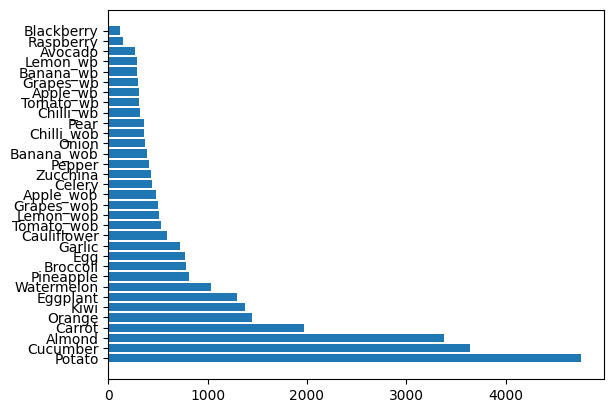

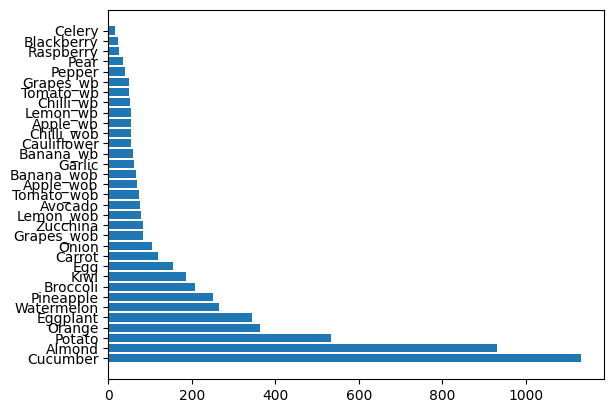

In [1]:
# try to plot balance using matplotlib
import matplotlib.pyplot as plt
import reorder_data

balance = [('Potato', 4759), ('Cucumber', 3643), ('Almond', 3381), ('Carrot', 1970), ('Orange', 1442), ('Kiwi', 1380), ('Eggplant', 1292), ('Watermelon', 1037), ('Pineapple', 810), ('Broccoli', 786), ('Egg', 773), ('Garlic', 720), ('Cauliflower', 585), ('Tomato_wob', 529), ('Lemon_wob', 509), ('Grapes_wob', 499), ('Apple_wob', 477), ('Celery', 435), ('Zucchina', 425), ('Pepper', 408), ('Banana_wob', 388), ('Onion', 370), ('Chilli_wob', 359), ('Pear', 354), ('Chilli_wb', 319), ('Tomato_wb', 307), ('Apple_wb', 304), ('Grapes_wb', 301), ('Banana_wb', 292), ('Lemon_wb', 290), ('Avocado', 266), ('Raspberry', 149), ('Blackberry', 117)]
category = np.array([x[0] for x in balance])
value = np.array([x[1] for x in balance])

val_balance = reorder_data.find_dataset_balance("merged2/valid")
val_category = np.array([x[0] for x in val_balance])
val_value = np.array([x[1] for x in val_balance])
print(sum(value)) # there are 3 duplicate labels, but it seems to work
print(sum(val_value))
plt.barh(category, value)
plt.show()
plt.barh(val_category, val_value)
plt.show()

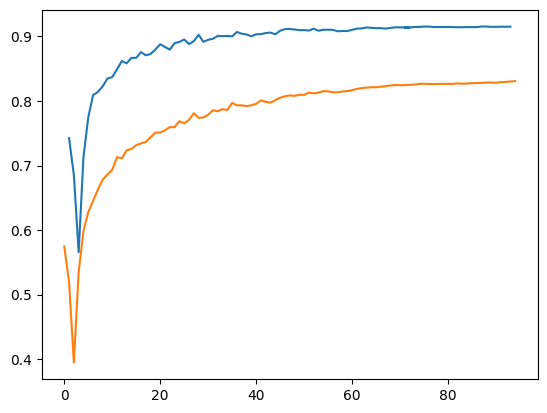

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_file.csv' with the actual CSV filename inside the directory
csv_path = "runs/detect/from_scratch_bs32/results.csv"  # example filename
with open(csv_path, "r", encoding="utf8") as csvfile:
	lst = list(csv.reader(csvfile))
array = np.array(lst)
# print(array)

results = pd.read_csv("runs/detect/from_scratch_bs32/results.csv")
mAP5095 = np.array(results["metrics/mAP50-95(B)"])
mAP50 = results["metrics/mAP50(B)"]
plt.plot(results["epoch"], mAP50, mAP5095)

45
45
{np.str_('Peas')}
[('Apple', 999), ('Tomato', 999), ('Cabbage', 999), ('Banana', 999), ('Orange', 999), ('Carrot', 999), ('Egg', 999), ('Lemon', 999), ('Corn', 999), ('Lime', 999), ('Butter', 999), ('Strawberries', 999), ('Avocado', 999), ('Cheese', 999), ('Green beans', 999), ('Cucumber', 999), ('Potato', 999), ('Beans', 999), ('Spinach', 999), ('Almond', 999), ('Celery', 999), ('Blueberries', 999), ('Onion', 999), ('Pepper', 990), ('Chilli', 984), ('Salad', 971), ('Broccoli', 899), ('Pineapple', 875), ('Grapes', 864), ('Watermelon', 786), ('Eggplant', 786), ('Pear', 706), ('Cauliflower', 661), ('Garlic', 548), ('Raspberry', 439), ('Kiwi', 370), ('Asparagus', 289), ('Lettuce', 280), ('Artichoke', 275), ('Blackberry', 266), ('Mango', 132), ('Peach', 121), ('Strawberry', 105), ('Brussel sprouts', 60), ('Peas', 57)]
[('Tomato', 199), ('Banana', 199), ('Apple', 199), ('Orange', 199), ('Broccoli', 199), ('Egg', 199), ('Grapes', 199), ('Lemon', 199), ('Chilli', 199), ('Cucumber', 199)

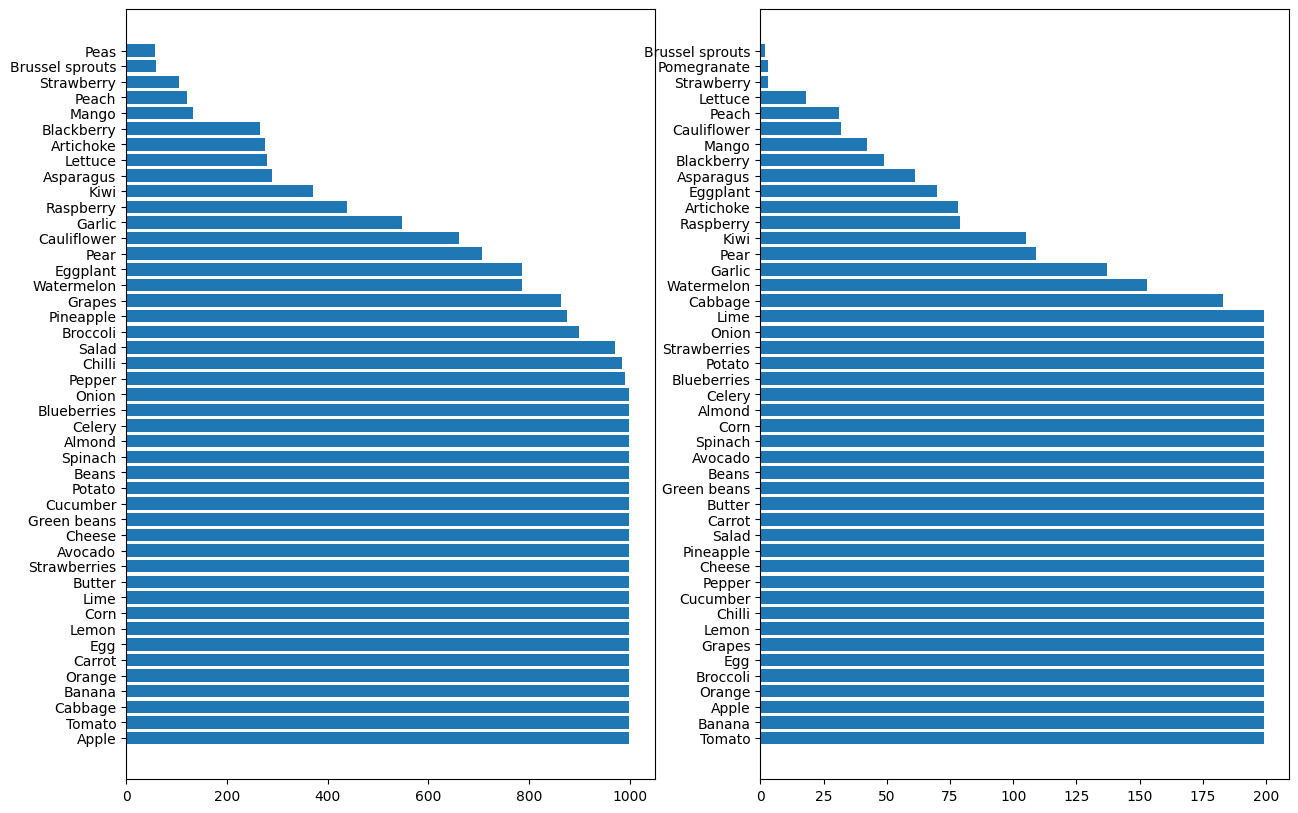

In [2]:
# plot balance for newly created dataset with many many classes
from reorder_data import find_dataset_balance
import matplotlib.pyplot as plt

dataset = "final"

def condition(x):
    return x[0] not in {'Olive', 'Raspberries', 'Plum', 'Brussel sprouts' 'Peas', 'Clementine', 'Blackberries', 'Ginger', 'Nuts'} # fewer than 100 instances in training

train_balance = find_dataset_balance(f"{dataset}/train")
train_category = np.array([x[0] for x in train_balance if condition(x)])
train_value = np.array([x[1] for x in train_balance if condition(x)])

val_balance = find_dataset_balance(f"{dataset}/valid")
val_category = np.array([x[0] for x in val_balance if condition(x)])
val_value = np.array([x[1] for x in val_balance if condition(x)])

print(len(train_value)) # there are 3 duplicate labels, but it seems to work
print(len(val_value))
print(set(train_category).difference(set(val_category)))
print(train_balance)
print(val_balance)

plt.rcParams["figure.figsize"] = (15, 10)
fig, axs = plt.subplots(1,2)
axs[0].barh(train_category, train_value)
axs[1].barh(val_category, val_value)
plt.show()
